# Assignment

In [77]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
from bokeh.plotting import figure, show,output_notebook

output_notebook()

# read "Chocolate_Sales.csv"
df = pd.read_csv("Chocolate_Sales.csv")

Loading BokehJS ...

# Data Cleaning & Data Processing

In [80]:
# find the sum of the duplicated row
df.duplicated().sum()
# Since there are no duplicate records in the dataset, there's no need to perform any data deduplication.

0

In [82]:
# find the sum of the null row 
df.isnull().sum()
# Since the result is zero for every column, there are no missing values in the dataset.

Sales Person     0
Country          0
Product          0
Date             0
Amount           0
Boxes Shipped    0
dtype: int64

In [84]:
# Format the date and change its type into datetime
df["Date"] = pd.to_datetime(df["Date"], format='%d-%b-%y')

In [86]:
# remove the dollar sign and , then change its type into int
df["Amount"] = df["Amount"].str.replace('[$,]','',regex=True).astype(int)

In [88]:
# Check whether there is amount that is negative value
print("[Amount] that is negative value: ",df[df["Amount"] < 0]["Amount"].count())
#There is no Amount that is negative number

# Check whether there is boxes shipped that is negative value
print("[Boxes Shipped] that is negative value: ",df[df["Boxes Shipped"] < 0]["Boxes Shipped"].count())
#There is no Boxes Shipped that is negative number

[Amount] that is negative value:  0
[Boxes Shipped] that is negative value:  0


In [90]:
# Create another column called "Month" for later use
df["Month"] = df["Date"].dt.month

# Exploratory Data Analysis (EDA)

### a. The general information about the entire data set Chocolate_Sales.csv 

In [94]:
df.head(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320,180,1
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896,94,8
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501,91,7
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726,342,4
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685,184,2


In [96]:
df.tail(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
1089,Karlen McCaffrey,Australia,Spicy Special Slims,2022-05-17,4410,323,5
1090,Jehu Rudeforth,USA,White Choc,2022-06-07,6559,119,6
1091,Ches Bonnell,Canada,Organic Choco Syrup,2022-07-26,574,217,7
1092,Dotty Strutley,India,Eclairs,2022-07-28,2086,384,7
1093,Karlen McCaffrey,India,70% Dark Bites,2022-05-23,5075,344,5


In [98]:
df.sample(5)

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
791,Gigi Bohling,New Zealand,Smooth Sliky Salty,2022-01-10,700,97,1
696,Van Tuxwell,Canada,Peanut Butter Cubes,2022-06-24,6342,282,6
346,Curtice Advani,Australia,99% Dark & Pure,2022-01-07,4676,84,1
578,Jehu Rudeforth,UK,Milk Bars,2022-05-03,12068,227,5
22,Marney O'Breen,USA,After Nines,2022-05-30,4753,163,5


In [100]:
df.shape

(1094, 7)

There are 1094 rows and 7 columns

In [103]:
df.columns

Index(['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped',
       'Month'],
      dtype='object')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Sales Person   1094 non-null   object        
 1   Country        1094 non-null   object        
 2   Product        1094 non-null   object        
 3   Date           1094 non-null   datetime64[ns]
 4   Amount         1094 non-null   int32         
 5   Boxes Shipped  1094 non-null   int64         
 6   Month          1094 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(3)
memory usage: 51.4+ KB


In [107]:
df.dtypes

Sales Person             object
Country                  object
Product                  object
Date             datetime64[ns]
Amount                    int32
Boxes Shipped             int64
Month                     int32
dtype: object

In [109]:
df[["Amount","Boxes Shipped"]].describe()

,Amount,Boxes Shipped
count,1094.000000,1094.000000
mean,5652.308044,161.797989
std,4102.442014,121.544145
min,7.000000,1.000000
25%,2390.500000,70.000000
50%,4868.500000,135.000000
75%,8027.250000,228.750000
max,22050.000000,709.000000


In [111]:
df.describe(include='object')

,Sales Person,Country,Product
count,1094,1094,1094
unique,25,6,22
top,Kelci Walkden,Australia,50% Dark Bites
freq,54,205,60


### b. List the chocolates sold out to India. 

In [114]:
# Find all the name of the chocolates that sold out to India
products = df.loc[df["Country"] == "India"]["Product"]

# Find the name of chocolates
products.unique()

array(['85% Dark Bars', 'Peanut Butter Cubes', 'Smooth Sliky Salty',
       'Fruit & Nut Bars', 'Manuka Honey Choco', 'Spicy Special Slims',
       'Eclairs', 'Almond Choco', '99% Dark & Pure', '50% Dark Bites',
       'Organic Choco Syrup', 'Raspberry Choco', 'Orange Choco',
       'Caramel Stuffed Bars', "Baker's Choco Chips", 'After Nines',
       'Drinking Coco', '70% Dark Bites', 'Milk Bars', 'Mint Chip Choco',
       'Choco Coated Almonds', 'White Choc'], dtype=object)

### c. Identify the salesperson with the highest sales by ranking them based on sales amount. 

In [117]:
# Sum the amount based on the sales person and sort it descendingly.
df.groupby(["Sales Person"])["Amount"].sum().sort_values(ascending=False).head(1)

Sales Person
Ches Bonnell    320901
Name: Amount, dtype: int32

Ches Bonnell 

### d. Find all sales region or store location where the transaction took place. 


In [121]:
# Find all sales region or store location
df["Country"].unique()

array(['UK', 'India', 'Australia', 'New Zealand', 'USA', 'Canada'],
      dtype=object)

Australia, Canada, India, New Zealand, UK and USA

### e. Do additional EDA steps to explain your problem definition in detail.

### Which chocolate products generate the highest revenue?

In [126]:
# Use Product and Amount columns
revenue = df[["Product", "Amount"]]

# Find the revenue by grouping the product based on the sum of the amount and sort it ascendingly
max_rev = revenue.groupby("Product")["Amount"].sum().sort_values(ascending=False)
# Get the top 3 revenues
top3_rev = max_rev.head(3)
print(top3_rev)

Product
Smooth Sliky Salty    349692
50% Dark Bites        341712
White Choc            329147
Name: Amount, dtype: int32


Smooth Sliky Salty,50% Dark Bites and White Choc

### Which countries contribute most to the total sales?

In [130]:
# Find the country sales by grouping based on country and sum the amount and sort it in descending order
country_sales = df.groupby("Country")["Amount"].sum().sort_values(ascending=False)

# Find the top 3 countries sales
top3_country_sales =country_sales.head(3)
print(top3_country_sales)

Country
Australia    1137367
UK           1051792
India        1045800
Name: Amount, dtype: int32


Australia, UK and India

### Do sales vary significantly across different months?

In [134]:
# Group by the month and sum all the amount
amount_according_month = df.groupby(["Month"])["Amount"].sum() 
print(amount_according_month)
amount_according_month.describe()

Month
1    896105
2    699377
3    749483
4    674051
5    752892
6    865144
7    803425
8    743148
Name: Amount, dtype: int32


count         8.00000
mean     772953.12500
std       77118.45656
min      674051.00000
25%      732205.25000
50%      751187.50000
75%      818854.75000
max      896105.00000
Name: Amount, dtype: float64

Yes, sales do vary significantly across different months. Month 1 has the highest amount. In Contrast, Month 4 marks the lowest amount. 

# 2.5 Data Visualization

### a. Plot the suitable type of chart to the top 3 countries where the maximum number of boxes shipped.

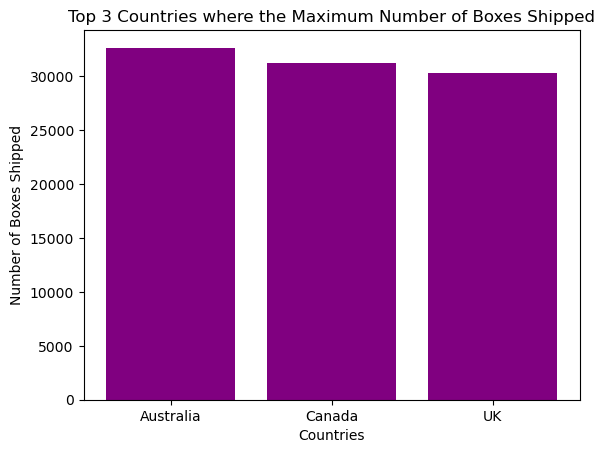

In [139]:
# Find Top 3 coutries by grouping based on the country and sum the boxes shipped and sort descendingly. Get only the first 3
top_3_countries = df.groupby("Country")["Boxes Shipped"].sum().sort_values(ascending=False).head(3)

# Set the title
plt.title("Top 3 Countries where the Maximum Number of Boxes Shipped")

# Plot a bar chart
plt.bar(x=top_3_countries.index,height=top_3_countries, color="purple")

# Label x-axis
plt.xlabel("Countries")

# Label y-axis
plt.ylabel("Number of Boxes Shipped")

# Show the plot
plt.show()

### b. Select the appropriate chart type to create an interactive visualization of the monthly sales report categorized by country.

In [142]:
# Create a Bokeh figure to visualize monthly sales by country
p = figure( height=600, width=800,
           title="Monthly Sales by Country",
             x_axis_label="Month", y_axis_label="Sales Amount",
             toolbar_location="above",
             tooltips=[("Month","@x"),("Sales Amount","@y")],
           tools="pan,box_zoom,reset,save,hover")

# Plot monthly sales as both line and scatter for a specific country
def findMonthlySalesBasedOnCountry(country, color):
  monthlySales = df[df["Country"] == country].groupby("Month")["Amount"].sum()
  p.line(x=monthlySales.index, y=monthlySales,legend_label=country,color=color)
  p.scatter(x=monthlySales.index,y=monthlySales,legend_label=country,color=color)

# Australia's monthly sales
findMonthlySalesBasedOnCountry("Australia", "green")

# Canada's monthly sales
findMonthlySalesBasedOnCountry("Canada", "red")

# United Kingdom's monthly sales
findMonthlySalesBasedOnCountry("UK", "blue")

# India's monthly sales
findMonthlySalesBasedOnCountry("India", "orange")

# New Zealand's monthly sales
findMonthlySalesBasedOnCountry("New Zealand", "brown")

# USA's monthly sales
findMonthlySalesBasedOnCountry("USA", "black")

# muting glyphs
p.legend.click_policy="mute"

# Show the plot
show(p)

### c. Draw more graphs/interactive graphs to explain your problem definition in detail.

### Which chocolate products generate the highest revenue?


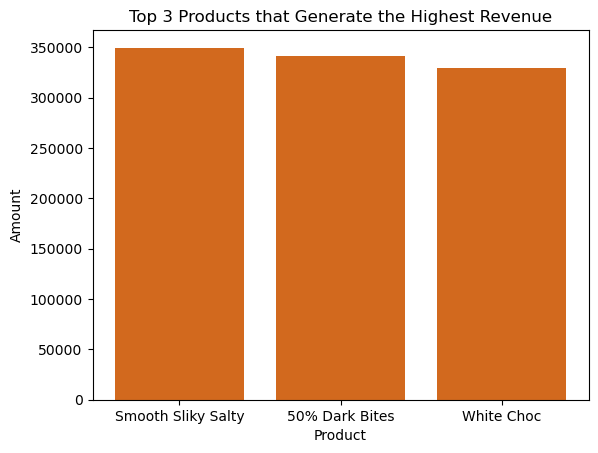

In [145]:
# Plot a bar chart with chocolate colour
plt.bar(x=top3_rev.index, height=top3_rev, color="chocolate")

# Set the title
plt.title("Top 3 Products that Generate the Highest Revenue")

# Set the x-axis label
plt.xlabel("Product")

# Set the y-axis label
plt.ylabel("Amount")

# Show the plot
plt.show()

### Which countries contribute most to the total sales?

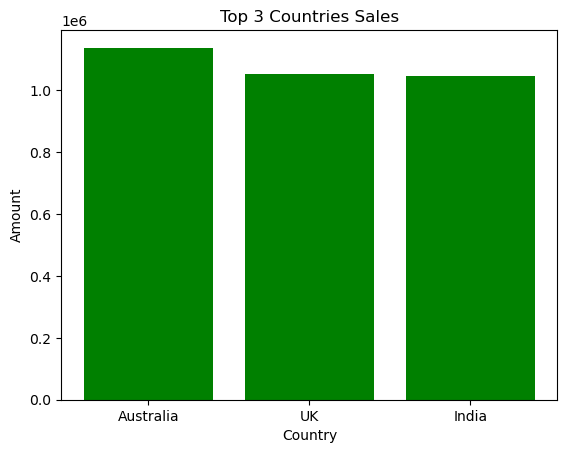

In [149]:
# Plot a bar chart with green colour
plt.bar(x=top3_country_sales.index, height=top3_country_sales,color="g")

# Set the title
plt.title("Top 3 Countries Sales")

# Set the x-axis label
plt.xlabel("Country")

# Set the y-axis label
plt.ylabel("Amount")

# Show the plot
plt.show()

### Do sales vary significantly across different months?

In [152]:
# Set the title, size of the figure, x-axis label, y-axis label and tools.
p = figure( height=600, width=800,
           title="Sales according to the Month",
             x_axis_label="Month", y_axis_label="Sales Amount",
             toolbar_location="above",
             tooltips=[('Month', '@x'), ('Sales Amount', '@y')],
           tools="pan,box_zoom,reset,save,hover")

# Plot a line with scatter graph 
p.line(x=amount_according_month.index, y=amount_according_month,color='red')
p.scatter(x=amount_according_month.index, y=amount_according_month,color='red')


# Show the figure
show(p)


From Month 1 to Month 2, there's a sharp drop in sales. Then there is a small recovery in Month 3. Another drop happens in Month 4, reaching the lowest point. Sales rise sharply again in Month 5 and peak around Month 6. After Month 6, sales decreased steadily into Month 8.